In [75]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import KMeansSMOTE  
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Lars
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")   

In [76]:
class_train = pd.read_csv("train_3.csv")
class_test = pd.read_csv("test_3.csv")
regression_train = pd.read_csv("train_4.csv")
regression_test = pd.read_csv("test_4.csv")

# Предварительная обработка

### Классификация

In [77]:
ids_class = class_test['id']

 # Определение типов признаков
class_cat = ["Sex", "HasPartner", "HasChild", "HasPhoneService", 
             "HasMultiplePhoneNumbers", "HasInternetService", 
             "HasOnlineSecurityService", "HasOnlineBackup", 
             "HasDeviceProtection", "HasTechSupportAccess", 
             "HasOnlineTV", "HasMovieSubscription", 
             "HasContractPhone", "IsBillingPaperless", 
             "PaymentMethod", "IsSeniorCitizen"]

class_num = ["ClientPeriod", "MonthlySpending", "TotalSpent"]
class_all = class_cat + class_num

# Предварительная обработка числовых столбцов
for column in class_num:
    # Заменяем пробелы и другие возможные пропуски на NaN
    class_train[column] = pd.to_numeric(class_train[column].replace(' ', np.nan), errors='coerce')
    class_test[column] = pd.to_numeric(class_test[column].replace(' ', np.nan), errors='coerce')
    
    # Заполняем средним
    mean_val = class_train[column].mean()
    class_train[column].fillna(mean_val, inplace=True)
    class_test[column].fillna(mean_val, inplace=True)

# Удаление столбца id (если есть)
class_train.drop("id", axis=1, inplace=True, errors='ignore')
class_test.drop("id", axis=1, inplace=True, errors='ignore')

# Кодирование категориальных признаков
le = LabelEncoder()
for column in class_cat:
    # Заменяем "No internet service" на "No" (если это логично)
    class_train[column] = class_train[column].replace("No internet service", "No")
    class_test[column] = class_test[column].replace("No internet service", "No")
    
    # Заменяем пустые строки и другие пропуски на самое частое значение
    most_frequent = class_train[column].mode()[0]
    class_train[column].fillna(most_frequent, inplace=True)
    class_test[column].fillna(most_frequent, inplace=True)
    
    # Кодируем в числа
    class_train[column] = le.fit_transform(class_train[column].astype(str))
    class_test[column] = le.transform(class_test[column].astype(str))

# Масштабирование числовых признаков
scaler = MinMaxScaler()
class_train[class_num] = scaler.fit_transform(class_train[class_num])
class_test[class_num] = scaler.transform(class_test[class_num])




class_train.dropna(inplace=True)
class_test.dropna(inplace=True)

missing_num_values = ["?", "NA", "N/A", "unknown", ""]
class_train[class_num] = class_train[class_num].replace(missing_num_values, np.nan)
class_test[class_num] = class_test[class_num].replace(missing_num_values, np.nan)


print("Пропуски в train:", class_train.isnull().sum().sum())
print("Пропуски в test:", class_test.isnull().sum().sum())

print("Столбцы в train:", class_train.columns)
print("Столбцы в test:", class_test.columns)

class_train.info()

Пропуски в train: 0
Пропуски в test: 0
Столбцы в train: Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')
Столбцы в test: Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 t

### Регрессия

In [78]:
regression_result = 'Цена'
ids_reg = regression_test["id"]
regression_train.drop("id", axis=1, inplace=True)
regression_test.drop("id", axis=1, inplace=True)
regression_train.drop("Без.ремонта", axis=1, inplace=True)
regression_train.drop("Совмещенный.санузел", axis=1, inplace=True)
regression_train.drop("Смешанные.стены", axis=1, inplace=True)
regression_train.drop("Иные.перекрытия", axis=1, inplace=True)
regression_num = []
regression_cat = []
for name in regression_train.columns:
    if regression_train[name].nunique() > 5:
        regression_num.append(name)
    else:
        regression_cat.append(name)
regression_num.remove(regression_result)
regression_all = regression_num + regression_cat
scaler = MinMaxScaler()
regression_train[regression_num] = scaler.fit_transform(regression_train[regression_num])
regression_test[regression_num] = scaler.fit_transform(regression_test[regression_num])
regression_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    float64
 4   Этажей.в.доме              808 non-null    float64
 5   Парковка                   808 non-null    int64  
 6   Дизайнерский               808 non-null    int64  
 7   Евроремонт                 808 non-null    int64  
 8   Косметический              808 non-null    int64  
 9   Балкон                     808 non-null    int64  
 10  Лоджия                     808 non-null    int64  
 11  Раздельный.санузел         808 non-null    int64  
 12  Лифт                       808 non-null    int64  
 13  Грузовой.лифт              808 non-null    int64  

### Балансировка для классификации

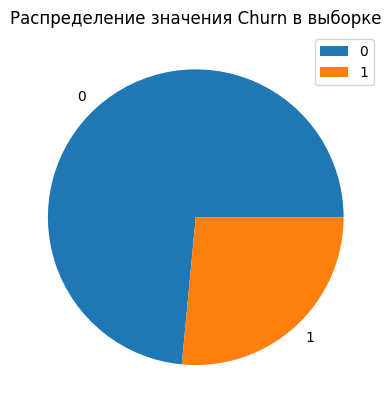

In [79]:
plt.pie(class_train["Churn"].value_counts(), labels=(0, 1))
plt.title("Распределение значения Churn в выборке")
plt.legend((0, 1))
plt.show()

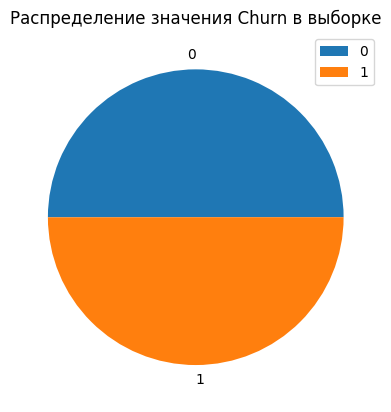

In [80]:
x = class_train[class_num + class_cat]
y = class_train["Churn"]
x, y = KMeansSMOTE(cluster_balance_threshold=0.3).fit_resample(x, y)
plt.pie(y.value_counts(), labels=(0, 1))
plt.title("Распределение значения Churn в выборке")
plt.legend((0, 1))
plt.show()

#### Разделение данных на обучающую и тестовую выборки

In [81]:

x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x, y, test_size=0.3, random_state=7)
x = regression_train[regression_all]
y = regression_train[regression_result]
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.3, random_state=7)

## Построение ансамблей моделей

In [ ]:
def get_best_score(best_scores, best_params, estimators=None):
    """
    Находит и выводит лучший результат (score) и параметры модели.
    
    Args:
        best_scores (list): Список оценок моделей.
        best_params (list): Список параметров моделей.
        estimators (list, optional): Список моделей. По умолчанию None.
    
    Returns:
        float: Лучший score из best_scores.
    """
    best_score = max(best_scores)  # Находим максимальный score
    best_id = best_scores.index(best_score)  # Индекс лучшей модели
    best_param = best_params[best_id]  # Параметры лучшей модели
    
    # Выводим информацию о лучшей модели
    if estimators:
        print(f"Best n_estimators: {best_param}")
        print(f"Best estimator: {estimators[best_id]}")
    else:
        print(f"Best estimators combination: {best_param}")
    print(f"Score: {round(best_score, 3)}")
    
    return best_score


def plot_single_graph(parameters, estimator_name, ax, train_acc, test_acc, regression=False):
    """
    Строит график accuracy для одной модели.
    
    Args:
        parameters (list): Параметры модели (например, n_estimators).
        estimator_name (str): Название модели.
        ax (matplotlib.axes): Ось для построения графика.
        train_acc (list): Точность на тренировочных данных.
        test_acc (list): Точность на тестовых данных.
        regression (bool, optional): Флаг регрессии. По умолчанию False.
    """
    ax.plot(parameters, train_acc, label="Train")  # График для train
    ax.plot(parameters, test_acc, label="Test")    # График для test
    ax.set_xlabel("n_estimators", labelpad=15)
    ax.set_title(estimator_name)  # Заголовок с названием модели
    
    # Подпись оси Y в зависимости от типа задачи
    if not regression:
        ax.set_ylabel("ROC-AUC", labelpad=15)
    else:
        ax.set_ylabel("R^2", labelpad=15)
    
    ax.legend()  # Легенда


def test_models(estimators, parameters, x_train, y_train, x_test, y_test, is_bagg=True, is_regression=False):
    """
    Тестирует модели с разными параметрами и возвращает лучший результат.
    
    Args:
        estimators (list): Список моделей для тестирования.
        parameters (dict): Параметры для настройки (например, n_estimators).
        x_train, y_train: Тренировочные данные.
        x_test, y_test: Тестовые данные.
        is_bagg (bool, optional): Использовать Bagging. По умолчанию True.
        is_regression (bool, optional): Флаг регрессии. По умолчанию False.
    
    Returns:
        float: Лучший score.
    """
    train_acc = {}  # Словарь для хранения accuracy на train
    test_acc = {}   # Словарь для хранения accuracy на test
    best_scores = []  # Лучшие scores для каждой модели
    best_params = []  # Лучшие параметры для каждой модели
    
    for estimator in estimators:
        train_acc[str(estimator)] = []
        test_acc[str(estimator)] = []
        
        # Перебираем параметры n_estimators
        for parameter in parameters["n_estimators"]:
            # Выбираем тип модели (Bagging/AdaBoost, Classifier/Regressor)
            model_cls = BaggingClassifier if is_bagg else AdaBoostClassifier
            if is_regression:
                model_cls = BaggingRegressor if is_bagg else AdaBoostRegressor
            
            # Создаем и обучаем модель
            model = model_cls(estimator, n_estimators=parameter, random_state=42)
            model.fit(x_train, y_train)
            
            # Оцениваем модель
            if not is_regression:
                train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
                test_score = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
            else:
                train_score = model.score(x_train, y_train)
                test_score = model.score(x_test, y_test)
            
            train_acc[str(estimator)].append(train_score)
            test_acc[str(estimator)].append(test_score)
        
        # Находим лучший score и параметры для текущей модели
        best_scores.append(max(test_acc[str(estimator)]))
        best_id = test_acc[str(estimator)].index(best_scores[-1])
        best_params.append(parameters["n_estimators"][best_id])
    
    # Строим графики и возвращаем лучший результат
    build_parameters_graph(parameters["n_estimators"], train_acc, test_acc, estimators)
    return get_best_score(best_scores, best_params, estimators)


def build_parameters_graph(parameters, train_score, test_score, estimators, is_regression=False):
    """
    Строит графики accuracy для всех моделей.
    
    Args:
        parameters (list): Параметры моделей (n_estimators).
        train_score (dict): Точность на train для каждой модели.
        test_score (dict): Точность на test для каждой модели.
        estimators (list): Список моделей.
        is_regression (bool, optional): Флаг регрессии. По умолчанию False.
    """
    fig, axs = plt.subplots(ncols=3, figsize=(20, 7))  # 3 графика в ряд
    fig.subplots_adjust(hspace=0.4)  # Отступ между графиками
    
    # Строим график для каждой модели
    for i, estimator in enumerate(estimators):
        plot_single_graph(parameters, str(estimator), axs[i], 
                         train_score[str(estimator)], test_score[str(estimator)], 
                         regression=is_regression)
    plt.show()


def create_stacking_model(estimators, x_train, y_train, x_test, y_test, sample_len=3, samples_cnt=5, is_regression=False):
    """
    Создает и тестирует Stacking-ансамбли из комбинаций моделей.
    
    Args:
        estimators (list): Базовые модели для стекинга.
        x_train, y_train: Тренировочные данные.
        x_test, y_test: Тестовые данные.
        sample_len (int, optional): Количество моделей в комбинации. По умолчанию 3.
        samples_cnt (int, optional): Количество комбинаций. По умолчанию 5.
        is_regression (bool, optional): Флаг регрессии. По умолчанию False.
    
    Returns:
        float: Лучший score.
    """
    new_combinations = list(combinations(estimators, sample_len))  # Все возможные комбинации
    names = []  # Названия комбинаций
    train = []  # Точность на train
    test = []   # Точность на test
    used_combinations = []  # Использованные комбинации
    
    for _ in range(samples_cnt):
        # Выбираем новую комбинацию
        combination, used_combinations = get_new_combinations(new_combinations, used_combinations)
        
        if not is_regression:
            model = StackingClassifier(combination)
            model.fit(x_train, y_train)
            y_pred_train = model.predict_proba(x_train)[:, 1]
            y_pred_test = model.predict_proba(x_test)[:, 1]
            train.append(roc_auc_score(y_train, y_pred_train))
            test.append(roc_auc_score(y_test, y_pred_test))
        else:
            model = StackingRegressor(combination, final_estimator=RandomForestRegressor())
            model.fit(x_train, y_train)
            train.append(model.score(x_train, y_train))
            test.append(model.score(x_test, y_test))
        
        # Формируем название комбинации
        name = " ".join([item for item, _ in combination])
        names.append(name)
    
    # Строим график и возвращаем лучший результат
    build_stacking_graph(names, train, test)
    return get_best_score(test, names)


def get_new_combinations(combinations, used):
    """
    Выбирает случайную комбинацию моделей, которая еще не использовалась.
    
    Args:
        combinations (list): Все возможные комбинации.
        used (list): Индексы уже использованных комбинаций.
    
    Returns:
        tuple: (комбинация, обновленный список used)
    """
    numb = random.randint(0, len(combinations) - 1)
    while numb in used:  # Ищем неиспользованную комбинацию
        numb = random.randint(0, len(combinations) - 1)
    used.append(numb)
    combination = list(combinations[numb])
    return combination, used


def build_stacking_graph(comb_names, train_scores, test_scores):
    """
    Строит bar-график для сравнения комбинаций моделей в стекинге.
    
    Args:
        comb_names (list): Названия комбинаций.
        train_scores (list): Точность на train.
        test_scores (list): Точность на test.
    """
    fig, ax = plt.subplots()
    fig.suptitle("Stacking")
    x = np.arange(len(comb_names))
    width = 0.35
    
    # Графики для train и test
    ax.bar(x - width/2, train_scores, width, label='Train')
    ax.bar(x + width/2, test_scores, width, label='Test')
    
    ax.set_xticks(x)
    ax.set_xticklabels(comb_names, rotation=90)  # Подписи с поворотом
    ax.set_xlabel("Model Combinations")
    ax.set_ylabel("Score")
    ax.legend()
    plt.tight_layout()
    plt.show()

### Классификация

##### Бэггинг

False
False
False


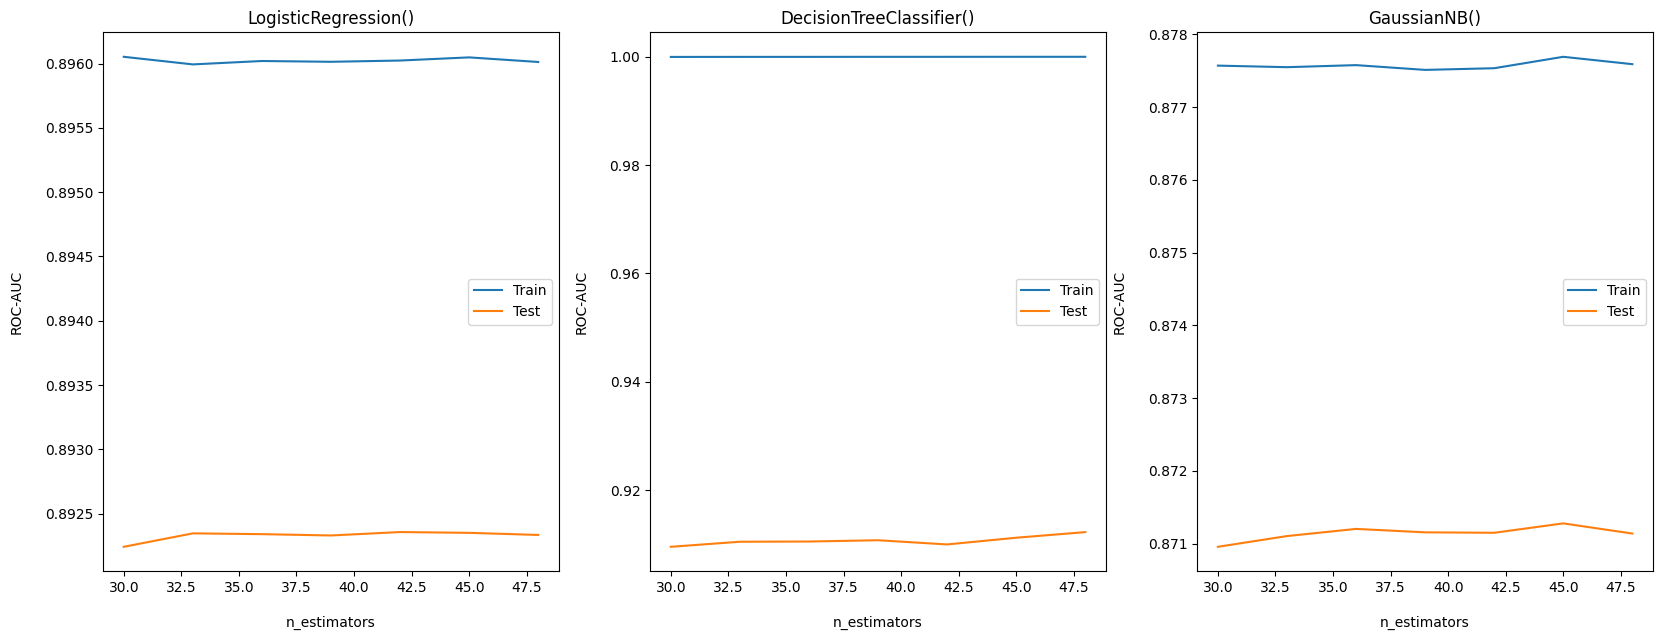

Best n_estimators: 48
Best estimator: DecisionTreeClassifier()
Score: 0.912


In [83]:

parameters = {
    "n_estimators": range(30, 50, 3)
}

estimators = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
score_bg_c = test_models(estimators, parameters, x_train_class, y_train_class, x_test_class, y_test_class, is_bagg=True)

##### Бустинг

False
False
False


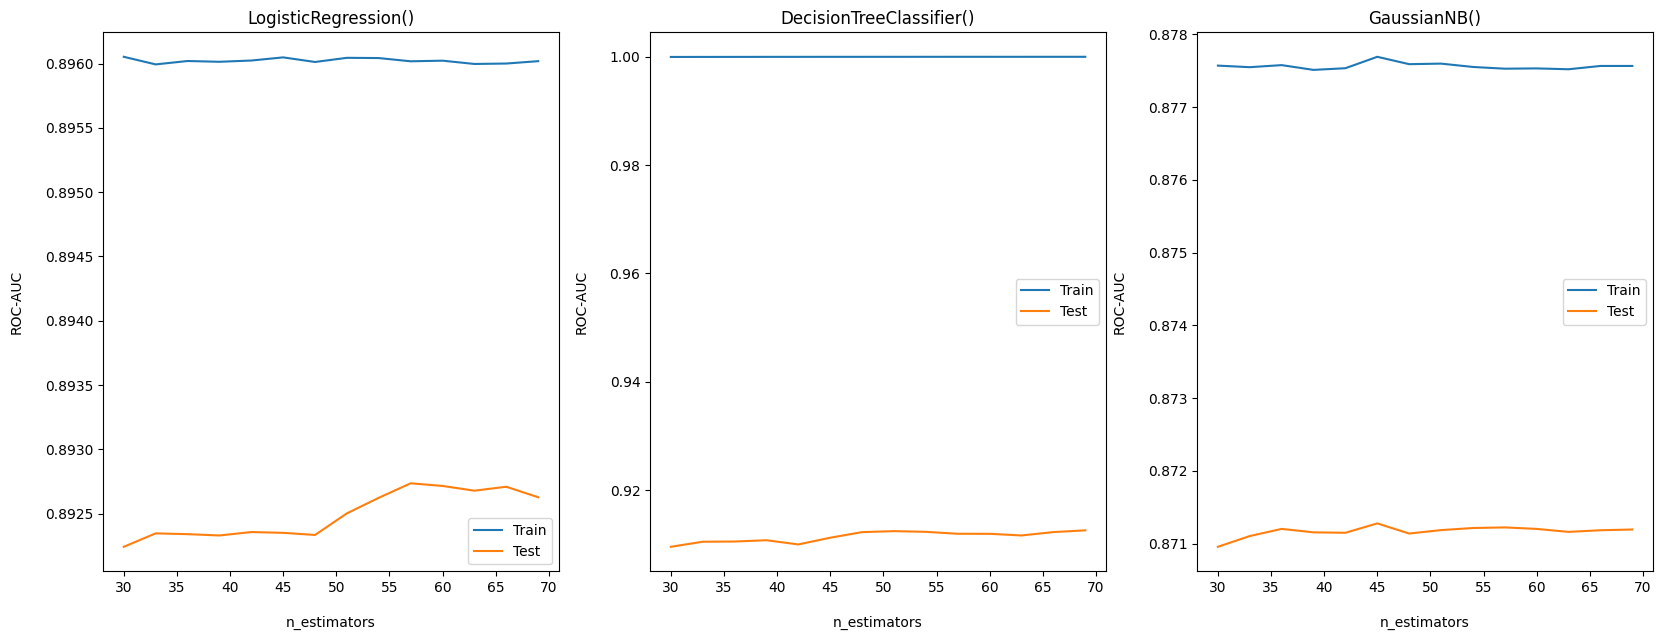

Best n_estimators: 69
Best estimator: DecisionTreeClassifier()
Score: 0.913


In [84]:
parameters = {
    "n_estimators": range(30, 70, 3)
}
estimators = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
score_bs_c = test_models(estimators, parameters, x_train_class, y_train_class, x_test_class, y_test_class)


##### Стэкинг

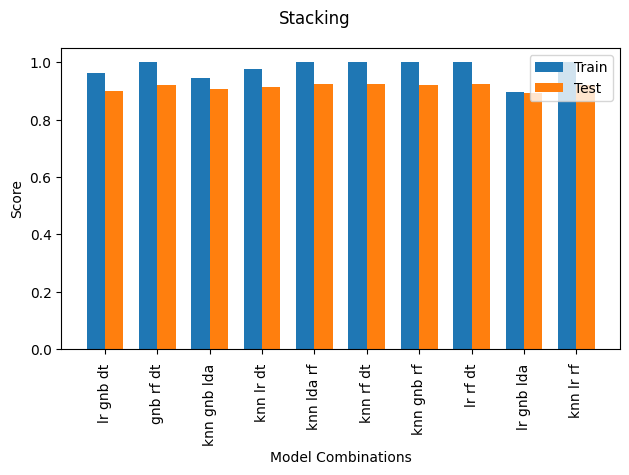

Best estimators combination: knn rf dt 
Score: 0.924


In [85]:
estimators = [
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression()),
    ('gnb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier())
]

score_s_c = create_stacking_model(estimators, x_train_class, y_train_class, x_test_class, y_test_class, samples_cnt=10)

## Регрессия

##### Бэггинг 

False
False
False


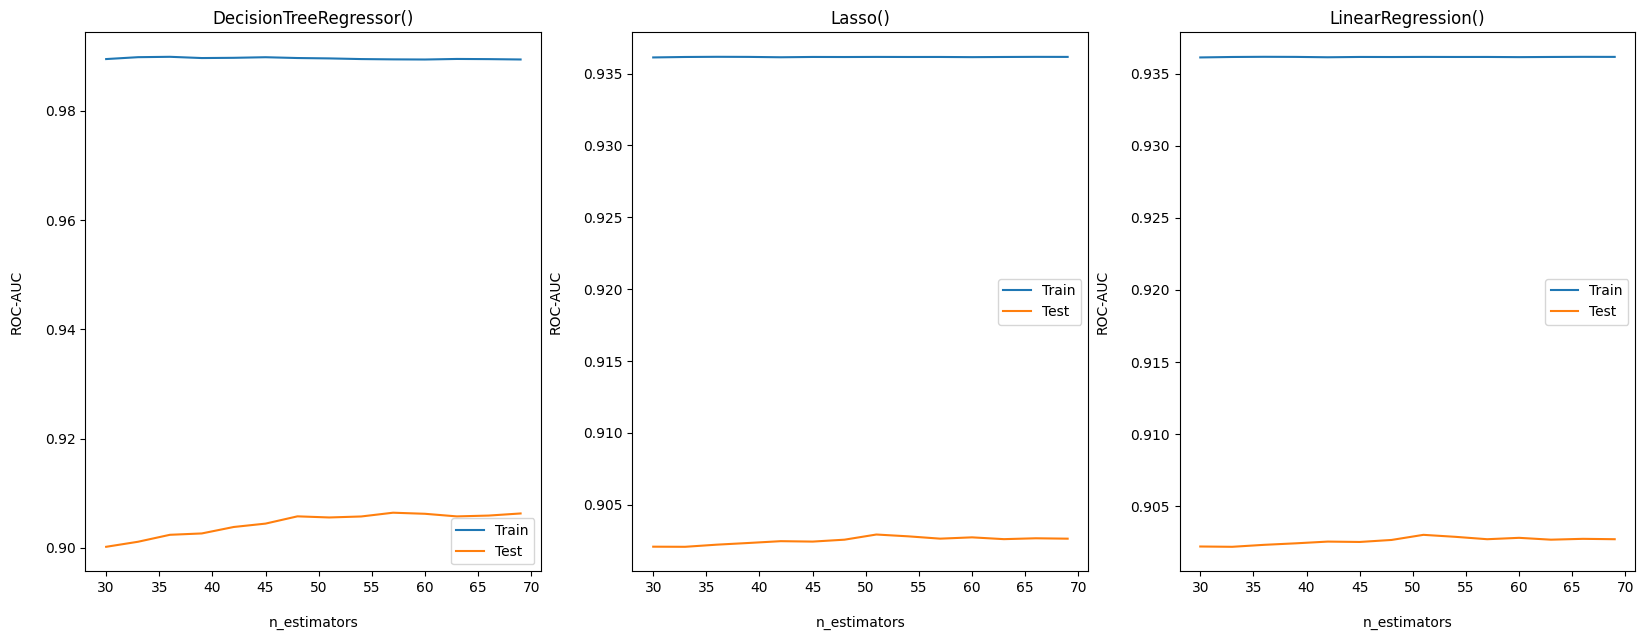

Best n_estimators: 57
Best estimator: DecisionTreeRegressor()
Score: 0.906


In [86]:
estimators = [DecisionTreeRegressor(), Lasso(), LinearRegression()]
score_bg_r = test_models(estimators, parameters, x_train_reg, y_train_reg, x_test_reg, y_test_reg, is_bagg=True, is_regression=True)

##### Бустинг

False
False
False


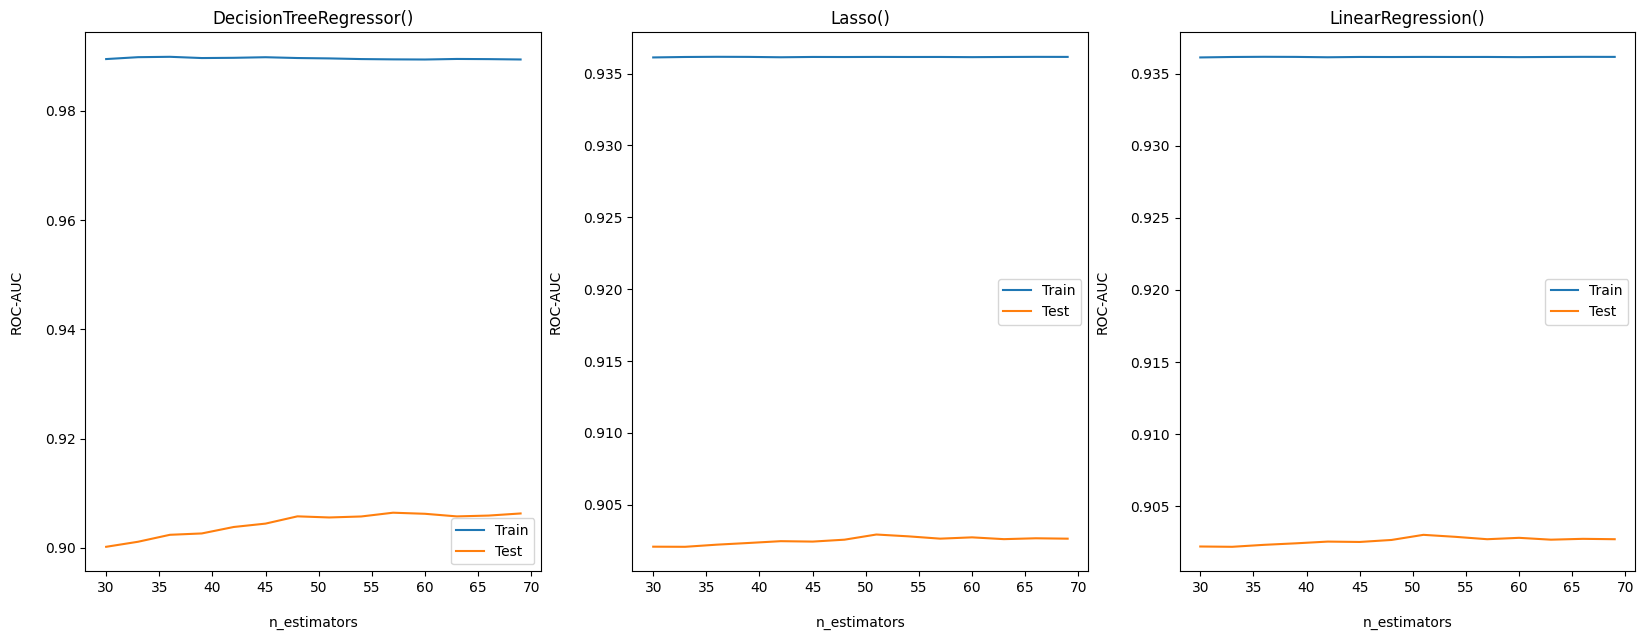

Best n_estimators: 57
Best estimator: DecisionTreeRegressor()
Score: 0.906


In [87]:
score_bs_r = test_models(estimators, parameters, x_train_reg, y_train_reg,
                         x_test_reg, y_test_reg, is_regression=True)

##### Стэкинг

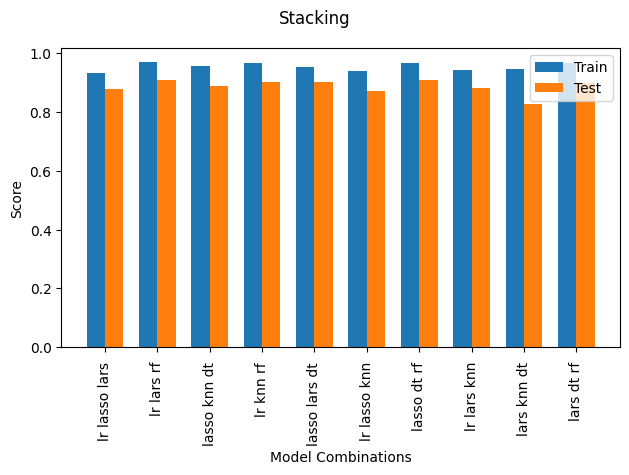

Best estimators combination: lr lars rf 
Score: 0.909


In [88]:
estimators = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('lars', Lars()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor())
]
score_s_r = create_stacking_model(estimators, x_train_reg, y_train_reg,
                                  x_test_reg, y_test_reg, is_regression=True, samples_cnt=10)

In [89]:
models_class = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

models_reg = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

results_class = {}
results_reg = {}

for name, model in models_class.items():
    model.fit(x_train_class, y_train_class)
    y_pred_train = model.predict(x_train_class)
    y_pred_test = model.predict(x_test_class)
    train_accuracy = accuracy_score(y_train_class, y_pred_train)
    test_accuracy = accuracy_score(y_test_class, y_pred_test)
    results_class[name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

for name, model in models_reg.items():
    model.fit(x_train_reg, y_train_reg)
    y_pred_train = model.predict(x_train_reg)
    y_pred_test = model.predict(x_test_reg)
    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)
    results_reg[name] = {'train_r2': train_r2, 'test_r2': test_r2}


In [90]:
print(results_class)
print(results_reg)

{'RandomForest': {'train_accuracy': 0.9996933455995094, 'test_accuracy': 0.8533619456366237}, 'GradientBoosting': {'train_accuracy': 0.8613922109782275, 'test_accuracy': 0.8276108726752504}}
{'RandomForest': {'train_r2': 0.9892289241001184, 'test_r2': 0.9065894304782511}, 'GradientBoosting': {'train_r2': 0.9804777345257606, 'test_r2': 0.909927076360134}}


In [91]:
class_models = pd.DataFrame(
    {
        "Model name": ["Логистическая регрессия", "Метод Ближайших Соседей", "Наивный Байесовский Классификатор", "Линейный Дискриминантный Анализ",
                         "Квадратичный Дискриминантный Анализ", "Машина Опорных Векторов", "Деревья решений", "Cлучайный лес", "Градиентный бустинг"],
        "Score": [0.795, 0.925, 0.782, 0.826, 0.827, 0.724, 0.810,  0.913, 0.922],
    }
)


In [92]:
regression_models = pd.DataFrame(
    {
        "Model name": ["Линейная регрессия", "Лассо регрессия", "Гребневая регрессия", "Elastic-Net", "Метод наименьших углов",
                       "Байесовская регрессия", "Обобщённая линейная регрессия", "Взвешенный МНК", "Полиномиальная регрессия",
                       "Непараметрическая регрессия", "Сплайновая регрессия", "Деревья решений", "Cлучайный лес", "Градиентный бустинг"],
        "R^2": [0.897, 0.898, 0.898, 0.888, 0.897, 0.898, 0.880, 0.878, 0.892, 0.696, 0.880, 0.845, 0.908, 0.909],
    }
)

In [93]:
class_models.loc[len(class_models.index)] = ["Бэггинг", round(score_bg_c, 3)]
class_models.loc[len(class_models.index)] = ["Бустинг", round(score_bs_c, 3)]
class_models.loc[len(class_models.index)] = ["Стеккинг", round(score_s_c, 3)]
print(class_models)


                             Model name  Score
0               Логистическая регрессия  0.795
1               Метод Ближайших Соседей  0.925
2     Наивный Байесовский Классификатор  0.782
3       Линейный Дискриминантный Анализ  0.826
4   Квадратичный Дискриминантный Анализ  0.827
5               Машина Опорных Векторов  0.724
6                       Деревья решений  0.810
7                         Cлучайный лес  0.913
8                   Градиентный бустинг  0.922
9                               Бэггинг  0.912
10                              Бустинг  0.913
11                             Стеккинг  0.924


In [94]:
regression_models.loc[len(regression_models.index)] = ["Бэггинг", round(score_bg_r, 3)]
regression_models.loc[len(regression_models.index)] = ["Бустинг", round(score_bs_r, 3)]
regression_models.loc[len(regression_models.index)] = ["Стеккинг", round(score_s_r, 3)]
print(regression_models)

                       Model name    R^2
0              Линейная регрессия  0.897
1                 Лассо регрессия  0.898
2             Гребневая регрессия  0.898
3                     Elastic-Net  0.888
4          Метод наименьших углов  0.897
5           Байесовская регрессия  0.898
6   Обобщённая линейная регрессия  0.880
7                  Взвешенный МНК  0.878
8        Полиномиальная регрессия  0.892
9     Непараметрическая регрессия  0.696
10           Сплайновая регрессия  0.880
11                Деревья решений  0.845
12                  Cлучайный лес  0.908
13            Градиентный бустинг  0.909
14                        Бэггинг  0.906
15                        Бустинг  0.906
16                       Стеккинг  0.909


In [95]:
def plot_bar_graph(ax, names, scoring, title):
    ax.bar(names, scoring)
    ax.set_title(title)
    ax.tick_params(axis="x", labelrotation=90)  
    ax.set_ylim((0.5, 1))
    for rect, score in zip(ax.patches, scoring):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.01, score, ha="center")
    ax.set_xlabel("Модель", labelpad=15)
    ax.set_ylabel("Score", labelpad=15)

def compare_models():
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
    fig.subplots_adjust(hspace=0.4)
    plot_bar_graph(axs[0], regression_models["Model name"], regression_models["R^2"], "Регрессии")
    plot_bar_graph(axs[1], class_models["Model name"], class_models["Score"], "Классификации")


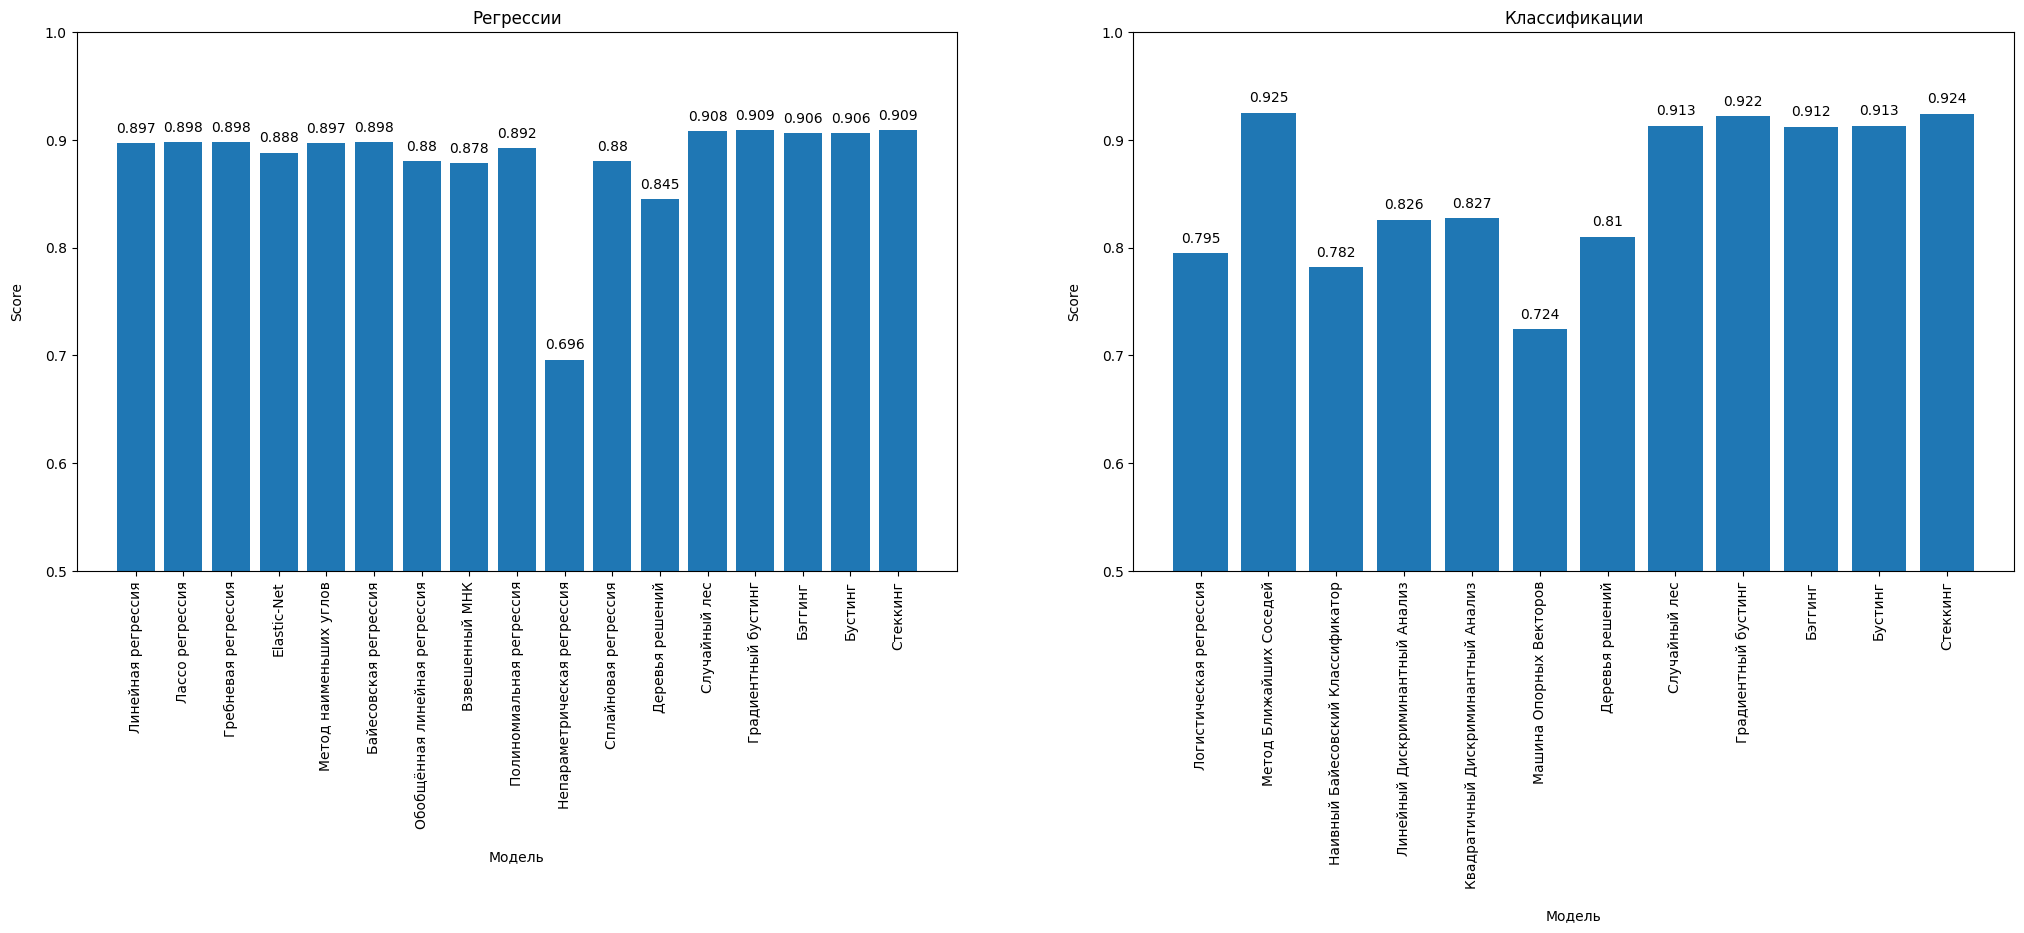

In [96]:
compare_models()

In [97]:

def create_stacking_model(estimators, x_train, y_train, is_regression=False):
    if not is_regression:
        model = StackingClassifier(estimators)
    else:
        model = StackingRegressor(estimators, final_estimator=RandomForestRegressor())
    model.fit(x_train, y_train)
    return model

estimators_reg = [('lasso', Lasso()), ('lars', Lars()), ('rf', RandomForestRegressor())]
estimators_class = [('knn', KNeighborsRegressor()), ('lr', LogisticRegression()), ('rf', RandomForestClassifier())]

best_model_reg = create_stacking_model(estimators_reg, x_train_reg, y_train_reg, is_regression=True)
best_model_class = create_stacking_model(estimators_class, x_train_class, y_train_class)

class_test = class_test[x_train_class.columns]
y_pred_class = best_model_class.predict(class_test)

submission_class = pd.DataFrame({'id': ids_class, 'Churn': y_pred_class})

submission_class.to_csv('submission_class.csv', index=False)
print("Файл submission_class.csv сохранен.")

regression_test = regression_test[regression_all]
y_pred_reg = best_model_reg.predict(regression_test)

submission_reg = pd.DataFrame({'id': ids_reg, 'Цена': y_pred_reg})

submission_reg.to_csv('submission_reg.csv', index=False)
print("Файл submission_reg.csv сохранен.")


Файл submission_class.csv сохранен.
Файл submission_reg.csv сохранен.
